<a href="https://colab.research.google.com/github/rahulgundala007/NLP_text_summarization/blob/main/BLEU_Scores_All_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install transformers datasets torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 21.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x8

In [2]:
pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 4.4 MB/s eta 0:00:00


In [3]:
pip install PyPDF2 transformers sacrebleu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 17.0 MB/s eta 0:00:00


In [18]:
extracted_text1="1. LICENSE GRANT Subject to this Agreement's terms, SIE Inc grants you a non-exclusive, non-commercial right to use System Software solely on your PS5 system. Your rights to use previous versions of System Software other than the current version of System Software terminates as soon as you can receive or have the most current version of System Software installed on your PS5 system. Certain license terms for SIE Inc-licensed, third-party software or service may require that SIE Inc provide you with notices and license terms for that third-party software or service. These notices and license terms are available to you at https://doc.dl.playstation.net/doc/ps5-oss/ or any other place which SIE Inc thinks appropriate. All rights to use System Software are granted by license only, and you are not granted any ownership rights or interests in System Software. SIE Inc and its licensors retain all intellectual property rights in System Software. All use of or access to System Software is subject to this Agreement's terms and applicable intellectual property laws. Except as this Agreement expressly grants, SIE Inc and its licensors reserve all rights in System Software. 2. RESTRICTIONS You may not lease, rent, sublicense, publish, modify, patch, adapt or translate System Software. You may not reverse engineer, decompile or disassemble System Software, create System Software derivative works, or attempt to create System Software source code from its object code. You may not (i) use any unauthorized, illegal, counterfeit or modified hardware or software with System Software; (ii) use tools to bypass, disable or circumvent any PS5 system encryption, security or authentication mechanism; (iii) reinstall earlier versions of the System Software ('downgrading'); (iv) violate any laws, regulations or statutes or rights of SIE Inc or third parties in connection with your access to or use of System Software; (v) use any hardware or software to cause System Software to accept or use unauthorized, illegal or pirated software or hardware; (vi) obtain System Software in any manner other than through SIE Inc's authorized distribution methods; or (vii) exploit System Software in any manner other than to use it with your PS5 system according to the accompanying documentation and with authorized software or hardware, including use of System Software to design, develop, update or distribute unauthorized software or hardware for use in connection with your PS5 system. These restrictions will be construed to apply to the greatest extent permitted by the law in your jurisdiction."

In [12]:
extracted_text2="SIE Inc may provide you with certain System Software updates, upgrades or services. Some updates, upgrades or services may be provided automatically when you sign in to PlayStation™Network and others may be available to you through SIE Inc's website or authorized channels. You consent to SIE Inc providing you these automatic updates, upgrades and services. Services may include the latest update or download of a new release of System Software containing security patches, new technology or revised settings and features that may prevent access to unauthorized or pirated content or prevent use of unauthorized hardware or software in connection with your PS5 system. These updates, upgrades and services may have effects on the functionality of your PS5 system, and SIE Inc is not responsible to you for any such effects or any harm caused by the installation process. You must install or have installed the most current version of System Software as soon as you reasonably can. Some updates, upgrades or services may change your current settings, cause a loss of data or content or cause functionality or feature loss. SIE Inc recommends that you regularly back up all data that you can. Third parties may make other services or content available to you, and they may require you to accept their separate terms and conditions and privacy policy. System Software may refer to, display or provide you with links to websites or content that third parties independently operate or maintain ('Third Party Content and Links'). SIE Inc and its affiliated companies do not control or direct Third Party Content and Links nor do SIE Inc and its affiliated companies monitor, approve, endorse, warrant or sponsor any Third Party Content and Links. SIE Inc and its affiliated companies have no liability to you for any Third Party Content and Links. Your reliance on any Third Party Content and Links is at your own risk, and you assume all responsibilities and consequences resulting from your reliance. Please see your PS5 system documentation for information on possible access controls to Third Party Content and Links via your PS5 system's or PlayStation™Network's parental controls. 4. COLLECTION OF INFORMATION/ AUTHENTICATION All data collected from this PS5 system is processed in accordance with the SIE Privacy Policy for your region. For more information about what personal information is collected, why it is collected, where and how it is processed, who it is shared with, and your legal rights, please see the SIE Privacy Policy for your account country, which can be accessed from your device settings or by visiting www.playstation.com/legal/privacy-policy. To the fullest extent permitted by law, residents of the United States, countries in North, Central, or South America, Japan or country/area located in East Asia or Southeast Asia, you hereby waive any rights or expectation of privacy, confidentiality, or publicity for any information in your gameplay or communications via your PS5 system, except as described in the PS5 User's Guide and Privacy Policy for your region. 5. WARRANTY DISCLAIMER AND LIMITATION OF LIABILITY System Software is provided 'AS IS' without any express or implied warranties, except as provided for under your statutory consumer rights under applicable local laws. SIE Inc, its affiliated companies and licensors expressly disclaim any implied warranty of merchantability, warranty of fitness for a particular purpose and warranty of non-infringement. IN NO EVENT ARE SIE INC, ITS AFFILIATES AND LICENSORS LIABLE FOR ANY LOSS OF DATA, LOSS OF PROFIT, OR ANY LOSS OR DAMAGE, WHETHER DIRECT, INDIRECT, INCIDENTAL, SPECIAL OR CONSEQUENTIAL, HOWEVER ARISING, AS A RESULT OF ACCESSING OR USING SYSTEM SOFTWARE. SO LONG AS THIS PROVISION IS ENFORCEABLE IN YOUR JURISDICTION, THE FOREGOING LIMITATIONS, EXCLUSIONS AND DISCLAIMERS APPLY TO THE FULLEST EXTENT PERMITTED BY LAW EVEN IF ANY REMEDY FAILS OF ITS ESSENTIAL PURPOSE. SOME COUNTRIES DO NOT ALLOW FOR THE ABOVE EXCLUSIONS OR LIMITATIONS, SO THESE LIMITATIONS AND EXCLUSIONS MAY NOT APPLY TO YOU. IF YOU RESIDE IN JAPAN OR COUNTRY/AREA LOCATED IN EAST ASIA OR SOUTHEAST ASIA AND IN CASE SIE INC, ITS AFFILIATES AND LICENSORS ARE LIABLE, REGARDLESS OF WHETHER THE LIABILITY IS ANY LOSS OF DATA, LOSS OF PROFIT, OR ANY LOSS OR DAMAGE, WHETHER DIRECT, INDIRECT, INCIDENTAL, SPECIAL OR CONSEQUENTIAL, HOWEVER ARISING, AS A RESULT OF ACCESSING OR USING SYSTEM SOFTWARE, NOTWITHSTANDING ANY OTHER PROVISION OF THIS AGREEMENT, THEIR LIABILITY WILL BE LIMITED TO DIRECT DAMAGES SUFFERED BY YOU UP TO THE AMOUNT ACTUALLY PAID BY YOU FOR PS5, UNLESS SIE INC, ITS AFFILIATES AND LICENSORS HAVE BEEN WILLFULLY OR GROSSLY NEGLIGENT. SO LONG AS THIS PROVISION IS ENFORCEABLE IN YOUR JURISDICTION, THE FOREGOING LIMITATIONS, EXCLUSIONS AND DISCLAIMERS APPLY TO THE FULLEST EXTENT PERMITTED BY LAW EVEN"

In [13]:
extracted_text3="If SIE Inc determines that you have violated this Agreement's terms, SIE Inc may itself or may procure the taking of any action to protect its interests such as disabling access to or use of some or all System Software, disabling use of this PS5 system online or offline, termination of your access to PlayStation™Network, denial of any warranty, repair or other services provided for your PS5 system, implementation of automatic or mandatory updates or devices intended to discontinue unauthorized use, or reliance on any other remedial efforts as reasonably necessary to prevent the use of modified or unpermitted use of System Software. SIE Inc, its affiliates and licensors reserve the right to bring legal action in the event of a violation of this Agreement. SIE Inc may participate in governmental or private legal action or investigation relating to your use of System Software. 7. EXPORT CONTROL AND COMPLIANCE WITH LAWS System Software may contain technology that is subject to certain restrictions under export-control laws and regulations. As such, your PS5 system may not be exported or re-exported to persons and entities in violation of these laws and regulations. You must comply with these laws when using System Software. 8. BINDING INDIVIDUAL ARBITRATION FOR RESIDENTS OF THE UNITED STATES OR COUNTRIES IN NORTH, CENTRAL, OR SOUTH AMERICA The following terms in this Section 8, to the fullest extent permitted under law, apply to you if you are a resident of the United States or a country in North, Central or South America. The term 'Dispute' means any dispute, claim, or controversy between you and SIE Inc, Sony Interactive Entertainment LLC, any of their current or former affiliates, or any predecessor or successor entity to any of the foregoing, including Sony Computer Entertainment Inc., Sony Computer Entertainment America LLC, and Sony Interactive Entertainment America LLC ('Sony Entity') regarding any and all uses of System Software, including but not limited to, the collection, use, storage or disclosure of data resulting from any use of System Software, whether based in contract, statute, regulation, ordinance, tort (including fraud, misrepresentation, fraudulent inducement or negligence), or any other legal or equitable theory, and includes the validity, enforceability or scope of this Section 8 (with the exception of the enforceability of the Class Action Waiver clause below). 'Dispute' has the broadest possible meaning that will be enforced. If you have a Dispute (other than one described as excluded from arbitration below) with any Sony Entity or a Sony Entity's officers, directors, employees and agents ('Adverse Sony Entity') that cannot be resolved through negotiation as required below, you and the Adverse Sony Entity must seek resolution of the Dispute only through arbitration of that Dispute according to Section 8's terms and not litigate that Dispute in court. Arbitration means that the Dispute will be resolved by a neutral arbitrator instead of in a court by a judge or jury. YOU AND THE SONY ENTITIES AGREE THAT ANY CLAIM FILED BY YOU OR BY A SONY ENTITY IN SMALL CLAIMS COURT IS NOT SUBJECT TO THE ARBITRATION TERMS CONTAINED IN THIS SECTION 8. IF YOU DO NOT WISH TO BE BOUND BY THE BINDING ARBITRATION AND CLASS ACTION WAIVER IN THIS SECTION 8, YOU MUST NOTIFY SIE INC IN WRITING WITHIN 30 DAYS OF THE DATE THAT YOU ACCEPT THIS AGREEMENT. YOUR WRITTEN NOTIFICATION MUST BE MAILED TO SONY INTERACTIVE ENTERTAINMENT INC. CARE OF SONY INTERACTIVE ENTERTAINMENT LLC, 2207 BRIDGEPOINTE PARKWAY, SAN MATEO, CA 94404, ATTN: LEG"


**T5 Model Testing**

In [34]:
from transformers import T5ForConditionalGeneration, AutoTokenizer

# Load the model and tokenizer
model_path = '/content/drive/MyDrive/SavedModel/T5/my_t5_summarizer'
model = T5ForConditionalGeneration.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

# Function to generate a summary
def generate_summary(text):
    input_text = "summarize: " + text
    inputs = tokenizer(input_text, return_tensors="pt", max_length=512, truncation=True)
    output_tokens = model.generate(
        inputs['input_ids'],
        attention_mask=inputs['attention_mask'],
        max_length=200,
        min_length=100,
        num_beams=5,
        early_stopping=True,
        no_repeat_ngram_size=2,
        length_penalty=1.0,
    )
    summary = tokenizer.decode(output_tokens[0], skip_special_tokens=True)
    return summary

# List of texts to summarize
texts_to_summarize = [extracted_text1, extracted_text2, extracted_text3]

# Generate and print summaries for each text
summaries = [generate_summary(text) for text in texts_to_summarize]
for i, summary in enumerate(summaries):
    print(f"Summary_{i+1}: {summary}")


Summary_1: SIE Inc and its licensors reserve all rights in System Software. RESTRICTIONS You may not lease, rent, sublicense, publish, modify, patch, adapt or translate System software to your PS5 system or to use it with other systems or services - including system software or software based on the system's original version or version of a previous version. (ii) use tools to bypass, disable or circumvent any system encryption, security or authentication mechanism, or reinstall earlier versions of the System
Summary_2: you consent to SIE Inc providing you these automatic updates, upgrades or services. Services may include the latest update or download of a new release of System Software containing security patches, new technology or revised settings and features that may prevent access to unauthorized or pirated content or prevent use of software in connection with your PS5 system. You must install or have installed the most current version as soon as you reasonably can. you may make o

In [48]:
Summary_1 ="SIE Inc and its licensors reserve all rights in System Software. RESTRICTIONS You may not lease, rent, sublicense, publish, modify, patch, adapt or translate System software to your PS5 system or to use it with other systems or services - including system software or software based on the system's original version or version of a previous version. (ii) use tools to bypass, disable or circumvent any system encryption, security or authentication mechanism, or reinstall earlier versions of the System."


In [43]:
Summary_2="you consent to SIE Inc providing you these automatic updates, upgrades or services. Services may include the latest update or download of a new release of System Software containing security patches, new technology or revised settings and features that may prevent access to unauthorized or pirated content or prevent use of software in connection with your PS5 system. You must install or have installed the most current version as soon as you reasonably can. you may make other services or content available to you, and they may require you to accept their separate terms and conditions and privacy policy."


In [44]:
Summary_3= "SIE Inc, its affiliates and licensors reserve the right to bring legal action in the event of a violation of this Agreement. the term 'Dispute' means any dispute, claim, or controversy between you and any predecessor or successor entity to any of the foregoing, including the collection, use, storage or disclosure of data resulting from any use of System Software, whether based in contract, statute, regulation, ordinance, tort (including fraud, misrepresentation, fraudulent inducement or negligence), or any"


In [8]:
import sacrebleu

def compute_bleu(generated_summary, reference_summary):
    bleu_score = sacrebleu.corpus_bleu([generated_summary], [[reference_summary]])
    return bleu_score.score

In [26]:
reference_summary1= "SIE Inc and its licensors retain all rights to the System Software. There are certain restrictions in place. You are not allowed to lease, rent, sublicense, publish, modify, patch, adapt or translate the System software to your PS5 system or use it with other systems or services, including software based on the systems original version or a previous version. Additionally, you may not use tools to bypass, disable or circumvent any system encryption, security or authentication mechanism, or reinstall earlier versions of the System."

In [27]:
reference_summary2="By using your PS5 system, you are giving your consent to SIE Inc to provide you with automatic updates, upgrades, or services. These services may include the latest update or download of a new System Software release that contains security patches, new technology, revised settings, and features that can prevent unauthorized or pirated content access or use of software with your PS5 system. It is essential to install or have the latest version installed as soon as possible. Other services or content may be available to you, and they may require you to accept their separate terms and conditions and privacy policy."

In [28]:
reference_summary3="SIE Inc, along with its affiliates and licensors, retains the right to take legal action in case of any violation of this Agreement. The term 'Dispute' refers to any disagreement, claim or controversy between you and any predecessor or successor entity to any of the foregoing. This includes any issues related to the collection, use, storage or disclosure of data resulting from the use of System Software. Such disputes may arise from a contract, statute, regulation, ordinance, tort (including fraud, misrepresentation, fraudulent inducement or negligence), or any other cause."

In [60]:

bleu_score = compute_bleu(Summary_1, reference_summary1)
print(f"BLEU score1: {bleu_score1}")



BLEU score1: 62.1412093079723


In [56]:
bleu_score2 = compute_bleu(Summary_2, reference_summary2)
print(f"BLEU score2: {bleu_score2}")

BLEU score2: 46.08134560551315


In [57]:
bleu_score3 = compute_bleu(Summary_3, reference_summary3)
print(f"BLEU score3: {bleu_score3}")

BLEU score3: 56.48216853977671


In [64]:
# BLEU scores
bleu_score1 = 62.1412093079723
bleu_score2 = 46.08134560551315
bleu_score3 = 56.48216853977671

# Calculate the average BLEU score
average_bleu_score = (bleu_score1 + bleu_score2 + bleu_score3) / 3

# Print the average BLEU score
print(f"The average BLEU score of T5 model is: {average_bleu_score:.2f}")


The average BLEU score of T5 model is: 54.90


In [74]:
pip install matplotlib


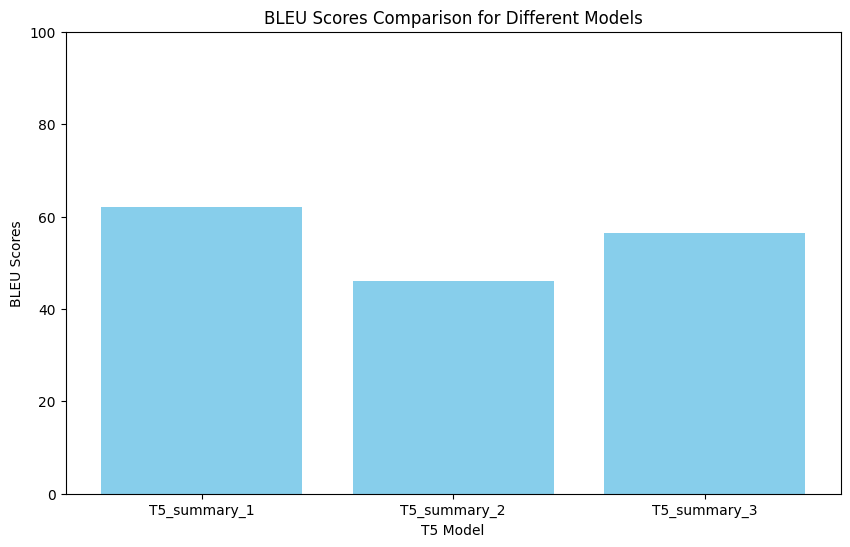

In [78]:
import matplotlib.pyplot as plt

# Example model names and their respective BLEU scores
model_names = ['T5_summary_1', 'T5_summary_2', 'T5_summary_3']
bleu_scores = [62.1412093079723, 46.08134560551315, 56.48216853977671]  # Example BLEU scores

# Create a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(model_names, bleu_scores, color='skyblue')  # Create a bar chart with sky blue color
plt.xlabel('T5 Model')  # Set the x-axis label
plt.ylabel('BLEU Scores')  # Set the y-axis label
plt.title('BLEU Scores Comparison for Different Models')  # Set the title of the graph
plt.ylim(0, 100)  # Optional: Set the limit for the y-axis

# Display the plot
plt.show()


**BART MODEL**

In [67]:
from transformers import BartTokenizer, BartForConditionalGeneration

# Define the path to the model and tokenizer
model_path = '/content/drive/MyDrive/SavedModel/BART/bart_summarizer'

# Load the tokenizer and model from a specified path
tokenizer = BartTokenizer.from_pretrained(model_path)
model = BartForConditionalGeneration.from_pretrained(model_path)

# Function to generate a summary
def generate_summary(text, tokenizer, model):
    inputs = tokenizer.encode_plus(text, return_tensors="pt", max_length=512, truncation=True)
    summary_ids = model.generate(
        inputs['input_ids'],
        attention_mask=inputs['attention_mask'],
        max_length=200,  # You can adjust this based on expected summary length
        min_length=100,  # You can adjust this based on the shortest desired summary length
        num_beams=5,
        early_stopping=True
    )
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# List of texts to summarize
texts_to_summarize = [extracted_text1, extracted_text2, extracted_text3]

# Generate and print summaries for each text
summaries = [generate_summary(text, tokenizer, model) for text in texts_to_summarize]
for i, summary in enumerate(summaries):
    print(f"Summary_{i+1}: {summary}")


Summary_1: SIE Inc grants you a non-commercial right to use System Software solely on your PlayStation 5 system, with strict restrictions on unauthorized use and exploitation. All use of or access to System Software is subject to this Agreement's terms and applicable intellectual property laws. Users may not reverse engineer, decompile or modify System Software, create System Software derivative works, circumvent security measures, or circumvent any PS5 system encryption, security or authentication mechanism. SIE Inc and its licensors retain all intellectual property rights in System Software.
Summary_2: SIE Inc may provide you with automatic updates, upgrades or services. These updates may have effects on the functionality of your PS5 system, and SIE Inc is not responsible for any harm caused by the installation process. Updates, upgrades and services may be provided automatically when you sign in to PlayStation™Network and others may be available to you through SIE's website or autho

In [70]:
Summary_BART_1= "SIE Inc grants you a non-commercial right to use System Software solely on your PlayStation 5 system, with strict restrictions on unauthorized use and exploitation. All use of or access to System Software is subject to this Agreement's terms and applicable intellectual property laws. Users may not reverse engineer, decompile or modify System Software, create System Software derivative works, circumvent security measures, or circumvent any PS5 system encryption, security or authentication mechanism. SIE Inc and its licensors retain all intellectual property rights in System Software."
Summary_BART_2= "SIE Inc may provide you with automatic updates, upgrades or services. These updates may have effects on the functionality of your PS5 system, and SIE Inc is not responsible for any harm caused by the installation process. Updates, upgrades and services may be provided automatically when you sign in to PlayStation™Network and others may be available to you through SIE's website or authorized channels. You must install or have installed the most current version of System Software as soon as you reasonably can. Updates or services may change your current settings, cause a loss of data or content or cause functionality or feature loss. For more information about what personal information is collected, how it is processed, who it is shared with, and your legal rights, please see the SIE Privacy Policy for your account country, which can be accessed from your device settings or by visiting www.playstation.com."
Summary_BART_3= "Sony Interactive Entertainment LLC, its affiliates, and licensors may initiate legal action to protect its interests, including disabling access to or use of some or all System Software, disabling use of this PS5 system online or offline, termination of your access to PlayStation™Network, denial of any warranty, repair or other services provided for unauthorized use, or reliance on automatic updates or devices intended to discontinue unauthorized use. The terms in this Agreement are intended to ensure compliance with applicable laws and regulations. Failure to comply may result in legal action."

In [88]:
bleu_score_BART1 = compute_bleu(Summary_BART_1, reference_summary1)
print(f"BLEU score1: {bleu_score_BART1}")
bleu_score_BART2 = compute_bleu(Summary_BART_2, reference_summary2)
print(f"BLEU score2: {bleu_score_BART2}")
bleu_score_BART3 = compute_bleu(Summary_BART_3, reference_summary3)
print(f"BLEU score3: {bleu_score_BART3}")

BLEU score1: 17.909444289601637
BLEU score2: 12.819646788785386
BLEU score3: 2.641456788378185


In [89]:
# BLEU scores
bleu_score1 = 17.909444289601637
bleu_score2 = 12.819646788785386
bleu_score3 = 2.641456788378185

# Calculate the average BLEU score
average_bleu_score = (bleu_score1 + bleu_score2 + bleu_score3) / 3

# Print the average BLEU score
print(f"The average BLEU score of BART model is: {average_bleu_score:.2f}")


The average BLEU score of BART model is: 11.12


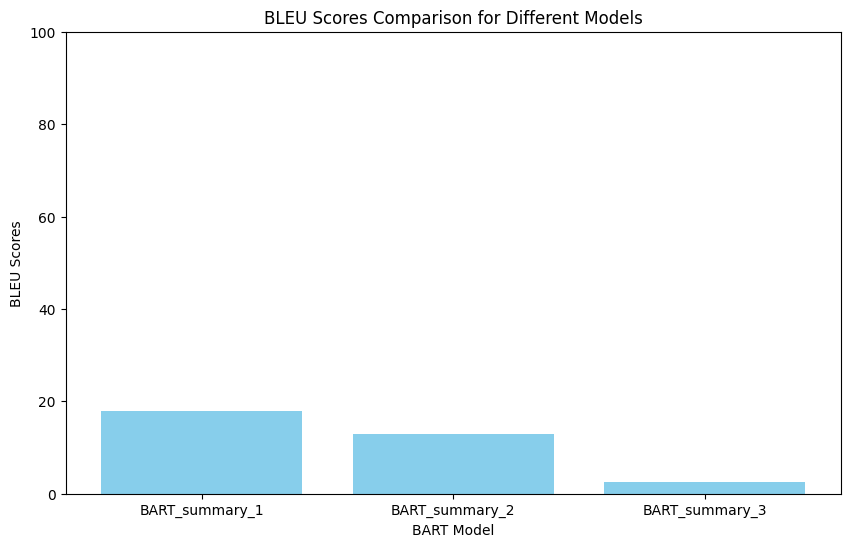

In [90]:
import matplotlib.pyplot as plt

# Example model names and their respective BLEU scores
model_names = ['BART_summary_1', 'BART_summary_2', 'BART_summary_3']
bleu_scores = [17.909444289601637, 12.819646788785386, 2.641456788378185]  # Example BLEU scores

# Create a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(model_names, bleu_scores, color='skyblue')  # Create a bar chart with sky blue color
plt.xlabel('BART Model')  # Set the x-axis label
plt.ylabel('BLEU Scores')  # Set the y-axis label
plt.title('BLEU Scores Comparison for Different Models')  # Set the title of the graph
plt.ylim(0, 100)  # Optional: Set the limit for the y-axis

# Display the plot
plt.show()

**GPT-2 Model**

In [84]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load the model and tokenizer
model_path = "/content/drive/MyDrive/SavedModel/GPT-2"
tokenizer_path = "/content/drive/MyDrive/SavedModel/GPT-2"
model = GPT2LMHeadModel.from_pretrained(model_path)
tokenizer = GPT2Tokenizer.from_pretrained(tokenizer_path)

def prepare_text(text, tokenizer):
    # Prepend the prompt to the text
    prompt =  text
    # Encode the text using the tokenizer
    encoded_input = tokenizer(prompt, return_tensors='pt', max_length=512, truncation=True, padding="max_length")
    return encoded_input

def generate_summary(text, model, tokenizer):
    # Prepare the text
    encoded_input = prepare_text(text, tokenizer)

    # Generate output using the model
    output_sequences = model.generate(
        input_ids=encoded_input['input_ids'],  # input tokens
        attention_mask=encoded_input['attention_mask'],  # attention masks
        max_new_tokens=500,  # maximum number of new tokens to generate
        min_length=100,  # minimum length of the output tokens
        num_return_sequences=1,  # number of output sequences to generate
        no_repeat_ngram_size=2,  # avoid repetition
        early_stopping=True  # stop once model predicts the eos_token
    )

    # Decode the output sequences to text
    summary = tokenizer.decode(output_sequences[0], skip_special_tokens=True)
    return summary

# List of texts to summarize
texts_to_summarize = [extracted_text1, extracted_text2, extracted_text3]

# Generate and print summaries for each text
summaries = [generate_summary(text, model, tokenizer) for text in texts_to_summarize]
for i, summary in enumerate(summaries):
    print(f"Summary_{i+1}:", summary)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Summary_1: 1. LICENSE GRANT Subject to this Agreement's terms, SIE Inc grants you a non-exclusive, non-commercial right to use System Software solely on your PS5 system. Your rights to use previous versions of System Software other than the current version of System Software terminates as soon as you can receive or have the most current version of System Software installed on your PS5 system. Certain license terms for SIE Inc-licensed, third-party software or service may require that SIE Inc provide you with notices and license terms for that third-party software or service. These notices and license terms are available to you at https://doc.dl.playstation.net/doc/ps5-oss/ or any other place which SIE Inc thinks appropriate. All rights to use System Software are granted by license only, and you are not granted any ownership rights or interests in System Software. SIE Inc and its licensors retain all intellectual property rights in System Software. All use of or access to System Softwar

In [92]:
Summary_GPT_1= "1. LICENSE GRANT Subject to this Agreement's terms, SIE Inc grants you a non-exclusive, non-commercial right to use System Software solely on your PS5 system. Your rights to use previous versions of System Software other than the current version of System Software terminates as soon as you can receive or have the most current version of System Software installed on your PS5 system. Certain license terms for SIE Inc-licensed, third-party software or service may require that SIE Inc provide you with notices and license terms for that third-party software or service. These notices and license terms are available to you at https://doc.dl.playstation.net/doc/ps5-oss/ or any other place which SIE Inc thinks appropriate. All rights to use System Software are granted by license only, and you are not granted any ownership rights or interests in System Software. SIE Inc and its licensors retain all intellectual property rights in System Software. All use of or access to System Software is subject to this Agreement's terms and applicable intellectual property laws. Except as this Agreement expressly grants, SIE Inc and its licensors reserve all rights in System Software. 2. RESTRICTIONS You may not lease, rent, sublicense, publish, modify, patch, adapt or translate System Software. You may not reverse engineer, decompile or disassemble System Software, create System Software derivative works, or attempt to create System Software source code from its object code. You may not (i) use any unauthorized, illegal, counterfeit or modified hardware or software with System Software; (ii) use tools to bypass, disable or circumvent any PS5 system encryption, security or authentication mechanism; (iii) reinstall earlier versions of the System Software ('downgrading'); (iv) violate any laws, regulations or statutes or rights of SIE Inc or third parties in connection with your access to or use of System Software; (v) use any hardware or software to cause System Software to accept or use unauthorized, illegal or pirated software or hardware; (vi) obtain System Software in any manner other than through SIE Inc's authorized distribution methods; or (vii) exploit System Software in any manner other than to use it with your PS5 system according to the accompanying documentation and with authorized software or hardware, including use of System Software to design, develop, update or distribute unauthorized software or hardware for use in connection with your PS5 system. These restrictions will be construed to apply to the greatest extent permitted by the"
Summary_GPT_2= "SIE Inc may provide you with certain System Software updates, upgrades or services. Some updates, upgrades or services may be provided automatically when you sign in to PlayStation™Network and others may be available to you through SIE Inc's website or authorized channels. You consent to SIE Inc providing you these automatic updates, upgrades and services. Services may include the latest update or download of a new release of System Software containing security patches, new technology or revised settings and features that may prevent access to unauthorized or pirated content or prevent use of unauthorized hardware or software in connection with your PS5 system. These updates, upgrades and services may have effects on the functionality of your PS5 system, and SIE Inc is not responsible to you for any such effects or any harm caused by the installation process. You must install or have installed the most current version of System Software as soon as you reasonably can. Some updates, upgrades or services may change your current settings, cause a loss of data or content or cause functionality or feature loss. SIE Inc recommends that you regularly back up all data that you can. Third parties may make other services or content available to you, and they may require you to accept their separate terms and conditions and privacy policy. System Software may refer to, display or provide you with links to websites or content that third parties independently operate or maintain ('Third Party Content and Links'). SIE Inc and its affiliated companies do not control or direct Third Party Content and Links nor do SIE Inc and its affiliated companies monitor, approve, endorse, warrant or sponsor any Third Party Content and Links. SIE Inc and its affiliated companies have no liability to you for any Third Party Content and Links. Your reliance on any Third Party Content and Links is at your own risk, and you assume all responsibilities and consequences resulting from your reliance. Please see your PS5 system documentation for information on possible access controls to Third Party Content and Links via your PS5 system's or PlayStation™Network's parental controls. 4. COLLECTION OF INFORMATION/ AUTHENTICATION All data collected from this PS5 system is processed in accordance with the SIE Privacy Policy for your region. For more information about what personal information is collected, why it is collected, where and how it is processed, who it is shared with, and your legal rights, please see the SIE Privacy Policy for your account country, which can be accessed from your device settings or by visiting www.playstation.com/legal/privacy-policy. To the fullest extent permitted by law,"
Summary_GPT_3= "If SIE Inc determines that you have violated this Agreement's terms, SIE Inc may itself or may procure the taking of any action to protect its interests such as disabling access to or use of some or all System Software, disabling use of this PS5 system online or offline, termination of your access to PlayStation™Network, denial of any warranty, repair or other services provided for your PS5 system, implementation of automatic or mandatory updates or devices intended to discontinue unauthorized use, or reliance on any other remedial efforts as reasonably necessary to prevent the use of modified or unpermitted use of System Software. SIE Inc, its affiliates and licensors reserve the right to bring legal action in the event of a violation of this Agreement. SIE Inc may participate in governmental or private legal action or investigation relating to your use of System Software. 7. EXPORT CONTROL AND COMPLIANCE WITH LAWS System Software may contain technology that is subject to certain restrictions under export-control laws and regulations. As such, your PS5 system may not be exported or re-exported to persons and entities in violation of these laws and regulations. You must comply with these laws when using System Software. 8. BINDING INDIVIDUAL ARBITRATION FOR RESIDENTS OF THE UNITED STATES OR COUNTRIES IN NORTH, CENTRAL, OR SOUTH AMERICA The following terms in this Section 8, to the fullest extent permitted under law, apply to you if you are a resident of the United States or a country in North, Central or South America. The term 'Dispute' means any dispute, claim, or controversy between you and SIE Inc, Sony Interactive Entertainment LLC, any of their current or former affiliates, or any predecessor or successor entity to any of the foregoing, including Sony Computer Entertainment Inc., Sony Computer Entertainment America LLC, and Sony Interactive Entertainment America LLC ('Sony Entity') regarding any and all uses of System Software, including but not limited to, the collection, use, storage or disclosure of data resulting from any use of System Software, whether based in contract, statute, regulation, ordinance, tort (including fraud, misrepresentation, fraudulent inducement or negligence), or any other legal or equitable theory, and includes the validity, enforceability or scope of this Section 8 (with the exception of the enforceability of the Class Action Waiver clause below). 'Dispute' has the broadest possible meaning that will be enforced. If you have a Dispute (other than one described as excluded from arbitration below"

In [93]:
bleu_score_GPT1 = compute_bleu(Summary_GPT_1, reference_summary1)
print(f"BLEU score1: {bleu_score_GPT1}")
bleu_score_GPT2 = compute_bleu(Summary_GPT_2, reference_summary2)
print(f"BLEU score2: {bleu_score_GPT2}")
bleu_score_GPT3 = compute_bleu(Summary_GPT_3, reference_summary3)
print(f"BLEU score3: {bleu_score_GPT3}")

BLEU score1: 10.293482562503096
BLEU score2: 12.200095076032285
BLEU score3: 14.0597821446422


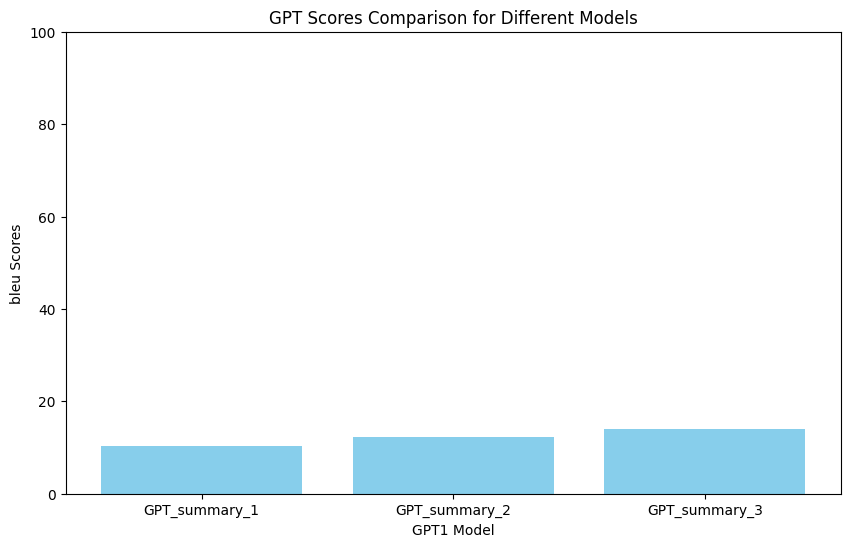

In [95]:
import matplotlib.pyplot as plt

# Example model names and their respective BLEU scores
model_names = ['GPT_summary_1', 'GPT_summary_2', 'GPT_summary_3']
bleu_scores = [10.293482562503096, 12.200095076032285, 14.0597821446422]  # Example BLEU scores

# Create a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(model_names, bleu_scores, color='skyblue')  # Create a bar chart with sky blue color
plt.xlabel('GPT1 Model')  # Set the x-axis label
plt.ylabel('bleu Scores')  # Set the y-axis label
plt.title('GPT Scores Comparison for Different Models')  # Set the title of the graph
plt.ylim(0, 100)  # Optional: Set the limit for the y-axis

# Display the plot
plt.show()

In [96]:
import matplotlib.pyplot as plt

# BLEU scores data for different models
models = {
    'GPT': {
        'names': ['GPT_summary_1', 'GPT_summary_2', 'GPT_summary_3'],
        'scores': [10.29, 12.20, 14.06]
    },
    'T5': {
        'names': ['T5_summary_1', 'T5_summary_2', 'T5_summary_3'],
        'scores': [62.14, 46.08, 56.48]
    },
    'BART': {
        'names': ['BART_summary_1', 'BART_summary_2', 'BART_summary_3'],
        'scores': [17.91, 12.82, 2.64]
    }
}


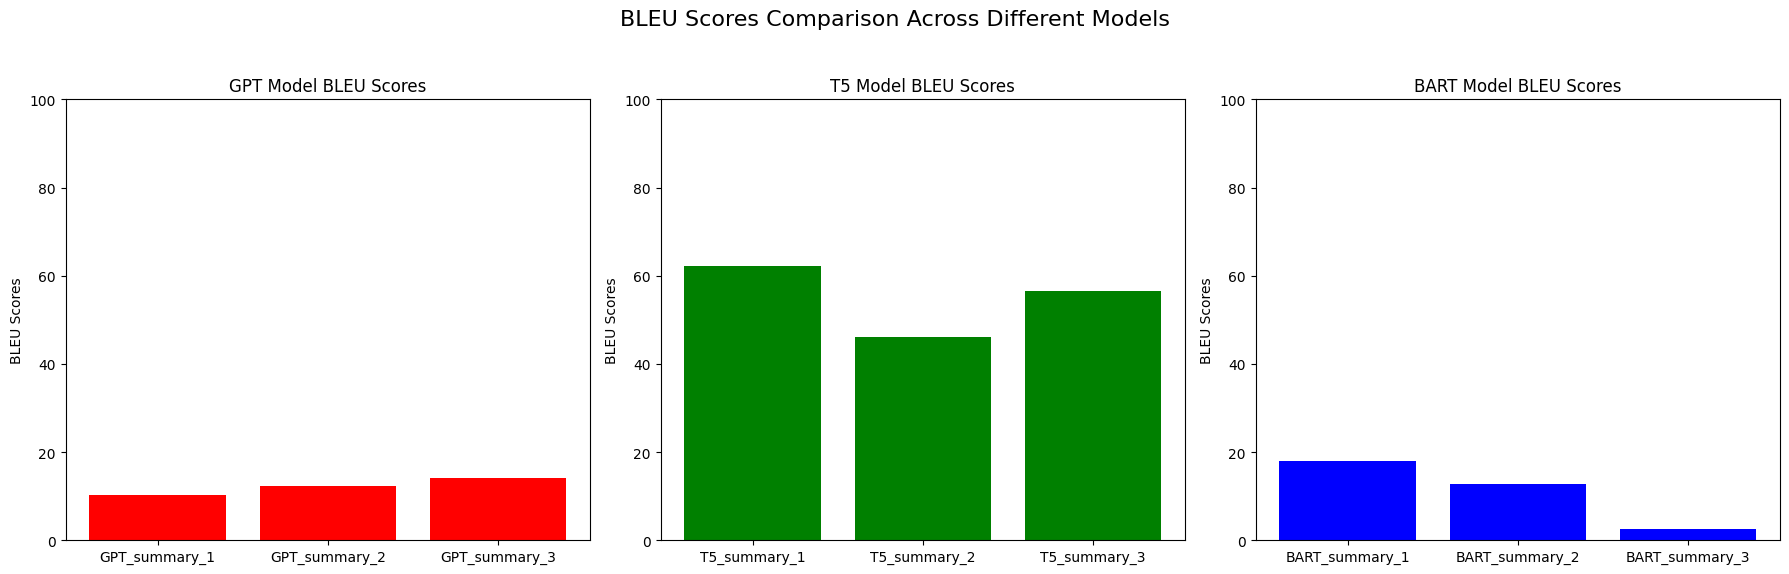

In [97]:
# Create a figure with three subplots arranged horizontally
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Set global title
fig.suptitle('BLEU Scores Comparison Across Different Models', fontsize=16)

# Plot GPT scores
axes[0].bar(models['GPT']['names'], models['GPT']['scores'], color='red')
axes[0].set_title('GPT Model BLEU Scores')
axes[0].set_ylim(0, 100)
axes[0].set_ylabel('BLEU Scores')

# Plot T5 scores
axes[1].bar(models['T5']['names'], models['T5']['scores'], color='green')
axes[1].set_title('T5 Model BLEU Scores')
axes[1].set_ylim(0, 100)
axes[1].set_ylabel('BLEU Scores')

# Plot BART scores
axes[2].bar(models['BART']['names'], models['BART']['scores'], color='blue')
axes[2].set_title('BART Model BLEU Scores')
axes[2].set_ylim(0, 100)
axes[2].set_ylabel('BLEU Scores')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rect to leave space for the global title

# Display the plot
plt.show()


In [98]:
# Compute average scores for each model
average_scores = {
    'GPT': sum(models['GPT']['scores']) / len(models['GPT']['scores']),
    'T5': sum(models['T5']['scores']) / len(models['T5']['scores']),
    'BART': sum(models['BART']['scores']) / len(models['BART']['scores'])
}


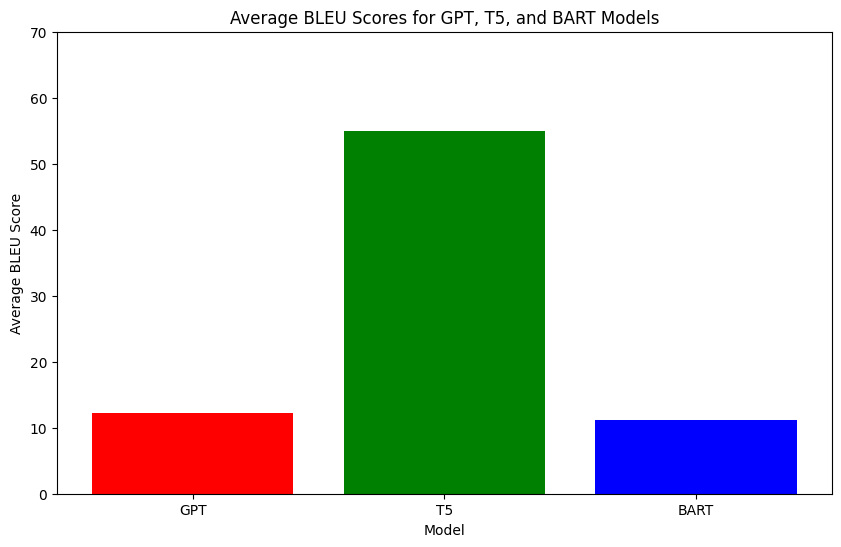

In [100]:
# Create a bar chart for the average BLEU scores
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(average_scores.keys(), average_scores.values(), color=['red', 'green', 'blue'])  # Create a bar chart with different colors for each model

plt.xlabel('Model')  # Set the x-axis label
plt.ylabel('Average BLEU Score')  # Set the y-axis label
plt.title('Average BLEU Scores for GPT, T5, and BART Models')  # Set the title of the graph
plt.ylim(0, 70)  # Set the limit for the y-axis to scale based on your score ranges

# Display the plot
plt.show()
